In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [353]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def damp_fuction(x, weight, avg):
    param_1, param_2, param_3, param_4, param_5, param_6, param_7 = weight
    y = sigmoid(x*param_1+ param_2)*abs(param_3) + param_7
    y2 = (1-sigmoid(x*param_4+ param_5))*abs(param_6) + param_7
    return y + y2

def get_loss(x,y, param_1, param_2, param_3,
             param_4, param_5, param_6, param_7, avg):
    pred_y = []
    weight = [param_1, param_2, param_3,
              param_4, param_5, param_6,param_7]
    for x_ in x:
        pred_y.append(damp_fuction(x_,weight, avg))
    loss = np.sqrt(np.sum((pred_y - y)**2))
    return loss

def get_gradient(x, y, param_1, param_2, param_3,
                 param_4, param_5, param_6, param_7, avg,
                 delta = 0.000001):
    
    grad_1 = (get_loss(x,y, param_1, param_2, param_3,
                       param_4, param_5, param_6, param_7, avg) - \
                get_loss(x,y, param_1+delta, param_2, param_3,
                         param_4, param_5, param_6, param_7, avg))\
                / delta
    grad_2 = (get_loss(x,y, param_1, param_2, param_3,
                       param_4, param_5, param_6, param_7, avg) - \
                get_loss(x,y, param_1, param_2+delta, param_3,
                         param_4, param_5, param_6, param_7, avg)) \
                / delta
    grad_3 = (get_loss(x,y, param_1, param_2, param_3,
                       param_4, param_5, param_6, param_7, avg) - \
                get_loss(x,y, param_1, param_2, param_3+delta,
                         param_4, param_5, param_6, param_7, avg)) \
                / delta
    grad_4 = (get_loss(x,y, param_1, param_2, param_3,
                       param_4, param_5, param_6, param_7, avg) - \
                get_loss(x,y, param_1, param_2, param_3,
                         param_4+delta, param_5, param_6, param_7, avg)) \
                / delta
    grad_5 = (get_loss(x,y, param_1, param_2, param_3,
                       param_4, param_5, param_6, param_7, avg) - \
                get_loss(x,y, param_1, param_2, param_3,
                         param_4, param_5+delta, param_6, param_7, avg)) \
                / delta    
    grad_6 = (get_loss(x,y, param_1, param_2, param_3,
                       param_4, param_5, param_6, param_7, avg) - \
                get_loss(x,y, param_1, param_2, param_3,
                         param_4, param_5, param_6+delta, param_7, avg)) \
                / delta  
    grad_7 = (get_loss(x,y, param_1, param_2, param_3,
                       param_4, param_5, param_6, param_7, avg) - \
                get_loss(x,y, param_1, param_2, param_3,
                         param_4, param_5, param_6, param_7+delta, avg)) \
                / delta 
    
    return grad_1, grad_2, grad_3, grad_4, grad_5, grad_6, grad_7

def update_weight(weight, grad, lr = 0.0001):
    param_1, param_2, param_3, param_4, param_5, param_6, param_7 = weight
    grad_1, grad_2, grad_3, grad_4, grad_5, grad_6, grad_7 = grad
    param_1 = param_1 + grad_1 * lr
    param_2 = param_2 + grad_2 * lr
    param_3 = param_3 + grad_3 * lr
    param_4 = param_4 + grad_4 * lr
    param_5 = param_5 + grad_5 * lr
    param_6 = param_6 + grad_6 * lr
    param_7 = param_7 + grad_7 * lr
    
    return  param_1, param_2, param_3, param_4, param_5, param_6, param_7

In [367]:
x = np.array([-2,-1,0,1])
#y = np.array(np.log(group_1_x.iloc[0]))
y = np.array([22, 20, 18, 19])
print(x)
print(y)

[-2 -1  0  1]
[22 20 18 19]


In [368]:
avg = y[0]
weight = [5, -1, 2, 2, 5, 2, avg/2]
grad = [0,0,0,0]
for i in range(1000):
    param_1, param_2, param_3, param_4, param_5, param_6, param_7 = weight
    grad = get_gradient(x, y, param_1, param_2, param_3,
                        param_4, param_5, param_6, param_7, avg = avg)
    weight = update_weight(weight, grad, lr = 0.1)
weight

(4.977812693929824,
 -2.0130927752455277,
 1.2742242631821314,
 4.287256782426694,
 4.203083033705308,
 4.267252147819532,
 8.933881887526852)

In [369]:
damp_fuction(x, weight, avg)

array([22.08178768, 20.092306  , 18.08076543, 19.0803697 ])

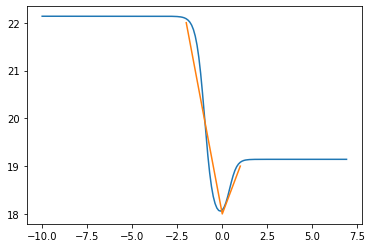

In [370]:
x_new = np.arange(-10, 7,0.1)
y_new = damp_fuction(x_new, weight, avg)
plt.plot(x_new, y_new)
plt.plot(x, y)